## Xg Boost Classification Implementation

## Holiday Package Prediciton

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
The data consists of 20 column and 4888 rows.

In [1]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [3]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
## check all categorical values
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [5]:
## merge Female and Fe Male both are same
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
## Single and Unmarried both are same 
df['MaritalStatus'] = df['MaritalStatus'].replace('Unmarried', 'Single')
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [8]:
## Check all missing value 
## these features with nan values
feaures_with_nan_value = [features for features in df.columns if df[features].isnull().sum()]
for feature in feaures_with_nan_value:
    print(feature, np.round(df[feature].isnull().mean()*100, 5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [9]:
df[feaures_with_nan_value].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [10]:
## age 
df.Age.fillna(df.Age.median(), inplace=True)

## TypeofContact 
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

## Duration
df.DurationOfPitch.fillna(df.DurationOfPitch.mode()[0], inplace=True)

## number of follow up
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

## prefered property start
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.median(), inplace=True)

## NumberofTrips
df.NumberOfTrips .fillna(df.NumberOfTrips .mode()[0], inplace=True)

## NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.median(), inplace=True)

## MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.mode()[0], inplace=True)

In [11]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [12]:
## not more important...
df.drop('CustomerID', inplace=True, axis=1)

## Feature Engineering
### Feature Extraction


In [13]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


    In that NumberofPersonVisition and NumberOfChildrenVisiting can be combined to form Total visiting. 
    Our main aim is to reduce the number of features or columns in the dataset.

In [14]:
## create new feature with combine both
df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [15]:
df.drop(columns=['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], inplace=True, axis=1)

In [16]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [17]:
## get all numerical features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical features : ', len(num_features))

Number of numerical features :  12


In [18]:
## get all categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical features : ', len(cat_features))

Number of Categorical features :  6


#### Discreate features:
Discreate features are those features which can take only a limited number of values. 


In [19]:
## Discrete fetures
discreate_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print("Number of discreate features : ", len(discreate_features))

Number of discreate features :  9


In [20]:
## Continuous features
continues_features = [feature for feature in num_features if len(df[feature].unique()) >= 25]
print('Number of continuous features : ', len(continues_features))

Number of continuous features :  3


### Training and Testing dataset split

In [21]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [22]:
from sklearn.model_selection import train_test_split

x = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']

In [23]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [24]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((3910, 17), (978, 17))

In [26]:
cat_features = x.select_dtypes(include='object').columns
num_features = x.select_dtypes(exclude='object').columns

In [27]:
## create column transform
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", oh_transformer, cat_features),
          ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [29]:
## applying Trnsformation in training(fit_transform)
x_train=preprocessor.fit_transform(x_train)

In [30]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.979376,1.284279,-0.725271,-0.111835,-0.632399,0.679690,0.782966,-0.326769,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.707355,0.282777,-0.725271,1.517765,-0.632399,0.679690,0.782966,-0.402026,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.979376,0.282777,1.771041,0.431365,-0.632399,0.679690,0.782966,-0.193780,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-0.979376,1.284279,-0.725271,-0.111835,-0.632399,1.408395,-1.277194,0.251303,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.394086,-1.720227,-0.725271,1.517765,-0.632399,-0.049015,-1.277194,0.020000,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.617934,1.284279,-0.725271,-0.655035,-0.632399,-1.506426,0.782966,-0.476913,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.858895,-0.718725,1.771041,-1.198235,-0.632399,1.408395,0.782966,1.528447,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.550720,0.282777,-0.725271,2.060964,-0.632399,-0.777720,0.782966,-0.305742,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.791682,1.284279,-0.725271,-0.111835,-0.632399,-1.506426,0.782966,-0.201158,0.643615


In [31]:
## applying transformation in testing 
x_test = preprocessor.transform(x_test)

In [32]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.738415,1.284279,-0.725271,-1.198235,-0.632399,-0.777720,-1.277194,-0.671510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.497453,0.282777,0.522885,-1.198235,1.581280,1.408395,-1.277194,-0.606398,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.827835,0.282777,-0.725271,0.974565,-0.632399,1.408395,0.782966,-0.364213,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.514566,2.285781,-0.725271,1.517765,-0.632399,-0.049015,0.782966,-0.066139,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-0.979376,0.282777,0.522885,-0.111835,1.581280,0.679690,0.782966,-0.263502,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721400,-0.979376,0.282777,-0.725271,1.517765,-0.632399,1.408395,0.782966,0.527611,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.099857,0.282777,1.771041,-0.655035,1.581280,-1.506426,-1.277194,-1.104787,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,1.068797,1.284279,-0.725271,-0.655035,1.581280,1.408395,0.782966,0.713723,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.738415,-2.721728,-0.725271,-0.655035,-0.632399,1.408395,0.782966,-1.100545,-0.774151


### Gradient Boost Training

In [33]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.738415,1.284279,-0.725271,-1.198235,-0.632399,-0.777720,-1.277194,-0.671510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.497453,0.282777,0.522885,-1.198235,1.581280,1.408395,-1.277194,-0.606398,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.827835,0.282777,-0.725271,0.974565,-0.632399,1.408395,0.782966,-0.364213,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.514566,2.285781,-0.725271,1.517765,-0.632399,-0.049015,0.782966,-0.066139,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-0.979376,0.282777,0.522885,-0.111835,1.581280,0.679690,0.782966,-0.263502,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721400,-0.979376,0.282777,-0.725271,1.517765,-0.632399,1.408395,0.782966,0.527611,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.099857,0.282777,1.771041,-0.655035,1.581280,-1.506426,-1.277194,-1.104787,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,1.068797,1.284279,-0.725271,-0.655035,1.581280,1.408395,0.782966,0.713723,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.738415,-2.721728,-0.725271,-0.655035,-0.632399,1.408395,0.782966,-1.100545,-0.774151


In [34]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.6/72.0 MB 8.4 MB/s eta 0:00:09
   - -------------------------------------- 2.9/72.0 MB 7.0 MB/s eta 0:00:10
   -- ------------------------------------- 3.9/72.0 MB 6.2 MB/s eta 0:00:11
   --- ------------------------------------ 5.8/72.0 MB 6.9 MB/s eta 0:00:10
   ---- ----------------------------------- 7.3/72.0 MB 7.1 MB/s eta 0:00:10
   ----- ---------------------------------- 9.4/72.0 MB 7.6 MB/s eta 0:00:09
   ------ --------------------------------- 11.8/72.0 MB 8.1 MB/s eta 0:00:08
   ------- -------------------------------- 13.9/72.0 MB 8.3 MB/s eta 0:00:07
   -------- ------------------------------- 15.7/72.0 MB 8.4 MB/s eta 0:00:07
   -------- ------------------------------- 16.0/72.0 MB 7.6 MB/s eta 0:00:08
   --------- ------------------------------ 17.3/72.0 MB 7.6 MB/s eta 0:00:08
   --------- ------------------------------ 17.6/72.0 MB 7.2 MB/s eta 0:00:08


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay

In [36]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Xg Boost': XGBClassifier(),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    ## prediction
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    ## training set performance
    model_train_accuracy = accuracy_score(y_train, y_pred_train)
    model_train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    model_train_recall = recall_score(y_train, y_pred_train)
    model_train_precision = precision_score(y_train, y_pred_train)
    model_train_roc = roc_auc_score(y_train, y_pred_train)

    ## test data performance
    model_test_accuracy = accuracy_score(y_test, y_pred_test)
    model_test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    model_test_recall = recall_score(y_test, y_pred_test)
    model_test_precision = precision_score(y_test, y_pred_test)
    model_test_roc = roc_auc_score(y_test, y_pred_test)

    ## print all values


    print(model)
    print('Performance of training dataset : ')
    print('Model Accuracy Score : ',model_train_accuracy)
    print('Model F1 Score : ',model_train_f1)
    print('Model Recall Score : ', model_train_recall)
    print('Model Precision Score : ', model_train_precision)
    print('Model ROC AUC Score : ',model_train_roc)

    print('\n')
    print('Performance of test dataset : ')
    print('Model Accuracy Score : ',model_test_accuracy)
    print('Model F1 Score : ',model_test_f1)
    print('Model Recall Score : ', model_test_recall)
    print('Model Precision Score : ', model_test_precision)
    print('Model ROC AUC Score : ',model_test_roc)
    print('###############################################################\n\n')

DecisionTreeClassifier()
Performance of training dataset : 
Model Accuracy Score :  1.0
Model F1 Score :  1.0
Model Recall Score :  1.0
Model Precision Score :  1.0
Model ROC AUC Score :  1.0


Performance of test dataset : 
Model Accuracy Score :  0.934560327198364
Model F1 Score :  0.9334592080519338
Model Recall Score :  0.7905759162303665
Model Precision Score :  0.8628571428571429
Model ROC AUC Score :  0.8800401817492366
###############################################################


LogisticRegression()
Performance of training dataset : 
Model Accuracy Score :  0.8465473145780051
Model F1 Score :  0.8208091766326018
Model Recall Score :  0.3045267489711934
Model Precision Score :  0.7047619047619048
Model ROC AUC Score :  0.6376453298455463


Performance of test dataset : 
Model Accuracy Score :  0.8384458077709611
Model F1 Score :  0.8117932991490602
Model Recall Score :  0.3036649214659686
Model Precision Score :  0.6987951807228916
Model ROC AUC Score :  0.63594936035179
##

In [37]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xg_params = {
    'learning_rate': [0.1, 0.01, 0.001, 0.02],
    'max_depth': [5, 8, 10, 20, 25, 30],
    'n_estimators': [100, 200, 300, 400, 500],
    'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]
}

In [38]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [39]:
xg_params

{'learning_rate': [0.1, 0.01, 0.001, 0.02],
 'max_depth': [5, 8, 10, 20, 25, 30],
 'n_estimators': [100, 200, 300, 400, 500],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [40]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ('XG', XGBClassifier(), xg_params)
                   ]

In [41]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('XG',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  {'learning

In [42]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XG -------------------
{'n_estimators': 300, 'max_depth': 25, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [43]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features=8,max_depth=None),
    'Xg Boost': XGBClassifier(n_estimators=300, max_depth=25, learning_rate=0.1, colsample_bytree=0.8)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9346
- F1 score: 0.9303
- Precision: 0.9635
- Recall: 0.6911
- Roc Auc Score: 0.8424


Xg Boost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9519
- F1 score: 0.9499
- Precision: 0.9675
- Recall: 0.7801
- Roc Auc Score: 0.8869




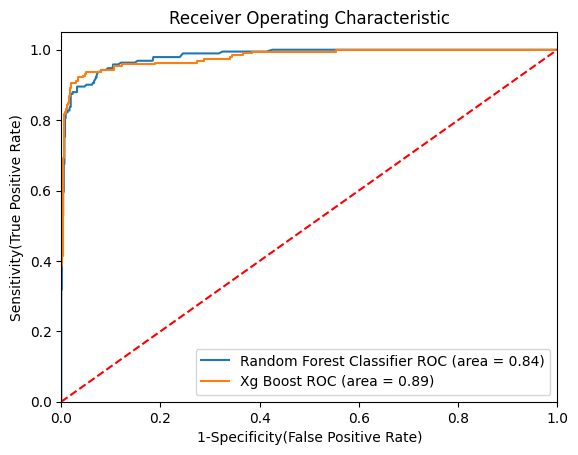

In [44]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=500,min_samples_split=2,
                                          max_features=8,max_depth=None),
    'auc':  0.8424
},
{
    'label': 'Xg Boost',
    'model': XGBClassifier(n_estimators=300, max_depth=25, learning_rate=0.1, colsample_bytree=0.8),
    'auc': 0.8869
}
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 